Utilização do 'Facebook Prophet' para a previsão 2020.
https://facebook.github.io/prophet/docs/quick_start.html

In [18]:
# Importa bibliotecas; inicializa variáveis; define funções.
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib as mpl 
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import math as mt

df = pd.read_csv('dadosRonaldo.csv')

df_prophet = df.loc[0:71,['data', 'total']]
df_prophet.rename(columns={'data': 'ds', 'total': 'y'}, inplace = True)
df_prophet.head()

,ds,y
0,2014-01-01,13427897
1,2014-02-01,14152120
2,2014-03-01,13710770
3,2014-04-01,12602895
4,2014-05-01,14603442


Cria e ajusta o modelo Prophet.

In [19]:
m = Prophet()

m.fit(df_prophet)

future = m.make_future_dataframe(periods=12, freq='MS')
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
79,2020-08-01,2.909555e+07,2.739059e+07,3.083366e+07
80,2020-09-01,2.799055e+07,2.636325e+07,2.978113e+07
81,2020-10-01,2.592714e+07,2.423826e+07,2.766490e+07
82,2020-11-01,2.814236e+07,2.629272e+07,2.995874e+07
83,2020-12-01,2.747290e+07,2.567324e+07,2.915835e+07


Resultado da previsão da série (yhat).

In [20]:
resultado = forecast.loc[72:83, ['ds','yhat']]
resultado = resultado.rename(columns={'ds': 'data'})
from datetime import date
resultado['data'] = resultado['data'].dt.strftime('%Y-%m-%d') # Ajusta a coluna da data.
resultado

,data,yhat
72,2020-01-01,2.291173e+07
73,2020-02-01,2.290039e+07
74,2020-03-01,2.434460e+07
75,2020-04-01,2.237586e+07
76,2020-05-01,2.312629e+07
77,2020-06-01,2.656537e+07
78,2020-07-01,2.565514e+07
79,2020-08-01,2.909555e+07
80,2020-09-01,2.799055e+07
81,2020-10-01,2.592714e+07


Valores reais da série ('total').

In [21]:
real = df.loc[72:83,['data', 'total']]
real

,data,total
72,2020-01-01,25113021
73,2020-02-01,24799556
74,2020-03-01,16697718
75,2020-04-01,21669098
76,2020-05-01,21893223
77,2020-06-01,32607220
78,2020-07-01,41851313
79,2020-08-01,33983713
80,2020-09-01,32205815
81,2020-10-01,33749277


Apresentação dos dados e rmse.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


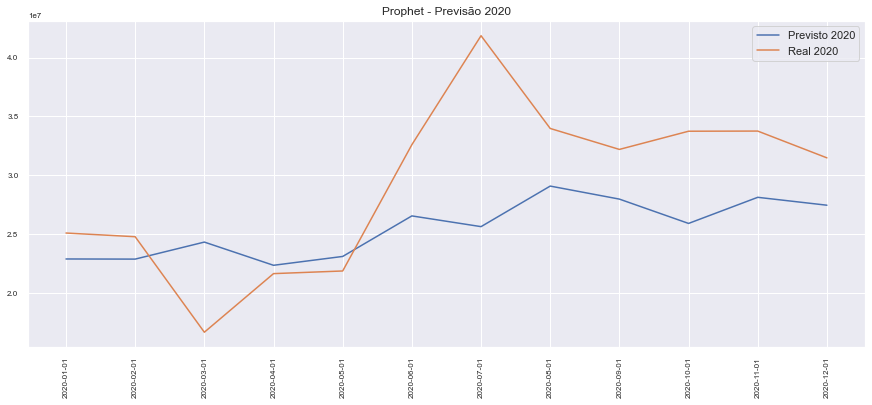

O valor do rmse é:  6572265.039806995


In [24]:
final_2020 = pd.merge(resultado, real, how = 'inner')
x = final_2020['data']
y1 = final_2020['yhat']
y2 =final_2020['total']

sns.set()
plt.figure(figsize=(15,6))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
plt.title('Prophet - Previsão 2020')
plt.xticks(rotation=90)
plt.plot(x,y1,label="Previsto 2020")
plt.plot(x,y2,label="Real 2020")
plt.legend()
plt.show()

#Calcula o rmse de cada variável.
print('O valor do rmse é: ', mt.sqrt(mean_squared_error(final_2020['yhat'], final_2020['total'])))